<h2>Boosting example by Mark Mace<br><br>
A few introductory code snipets, mostly from:</h2>
<br>
https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb 
<br>
<h2>and</h2>
<br> 
https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb
<br>
<h2>on boosting tree-based machine learning models</h2>

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# sklearn dataset for iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

<h3>Lets just look at some simple classification and regression problems <br>
We will start with sklearn's moon shaped classifier</h3>

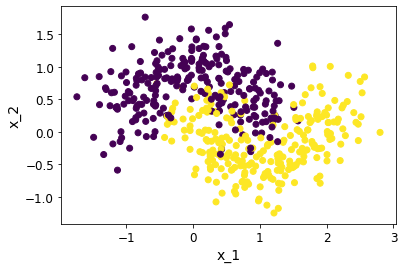

In [2]:
#EDA -- this is obviously a very simple problem
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
# perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# PLOT UTILITY
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


<h3>The most basic of trees </h3>

In [5]:
# the most basic tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

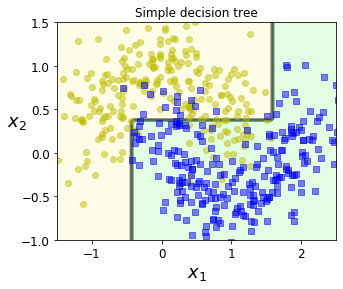

In [6]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Simple decision tree')
plt.show()

<h3>AdaBoost</h3>

In [7]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf_005 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.05, random_state=42)
ada_clf_005.fit(X_train, y_train)

ada_clf_1 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1.0, random_state=42)
ada_clf_1.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

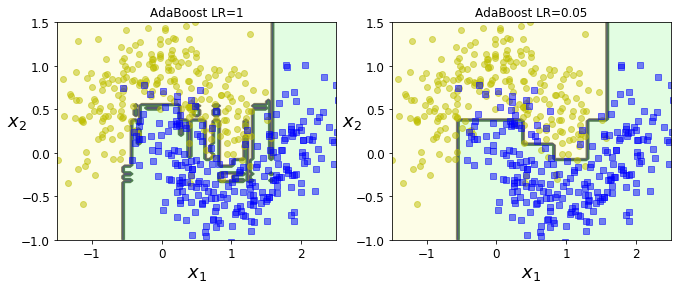

In [8]:
# compare two learning rates
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(ada_clf_1, X, y)
plt.title('AdaBoost LR=1')
plt.subplot(122)
plot_decision_boundary(ada_clf_005, X, y)
plt.title('AdaBoost LR=0.05')
plt.show()


<h3> Gradient boost decision tree </h3>

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf_1 = GradientBoostingClassifier(max_depth=1, n_estimators=200, 
                                  learning_rate=1.0, random_state=42)
gb_clf_1.fit(X, y)
gb_clf_005 = GradientBoostingClassifier(max_depth=1, n_estimators=200, 
                                    learning_rate=0.05, random_state=42)
gb_clf_005.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

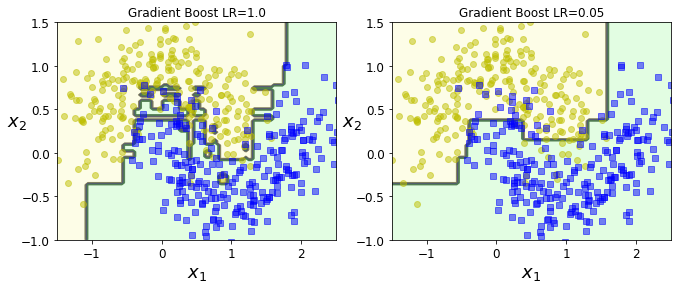

In [10]:
# compare two learning rates
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(gb_clf_1, X, y)
plt.title('Gradient Boost LR=1.0')
plt.subplot(122)
plot_decision_boundary(gb_clf_005, X, y)
plt.title('Gradient Boost LR=0.05')
plt.show()


<h3>Now let's just compare the accuracy of our classification with AdaBoost Gradient Boost vs simple decision tree</h3>

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tree_clf = tree_clf.predict(X_test)
print("tree_clf",accuracy_score(y_test, y_pred_tree_clf))


y_pred_ada_clf_005 = ada_clf_005.predict(X_test)
print("ada_clf_005",accuracy_score(y_test, y_pred_ada_clf_005))

y_pred_ada_clf_1 = ada_clf_1.predict(X_test)
print("ada_clf_1",accuracy_score(y_test, y_pred_ada_clf_1))


y_pred_gb_clf_005 = gb_clf_005.predict(X_test)
print("gb_clf_005",accuracy_score(y_test, y_pred_gb_clf_005))

y_pred_gb_clf_1 = gb_clf_1.predict(X_test)
print("gb_clf_1",accuracy_score(y_test, y_pred_gb_clf_1))


tree_clf 0.896
ada_clf_005 0.896
ada_clf_1 0.872
gb_clf_005 0.92
gb_clf_1 0.984


<h2> A simple regression </h2>

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2
y_reg = y_reg + np.random.randn(m, 1) / 10

<h3> Simple decision tree </h3>

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg1.fit(X_reg, y_reg)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

<h3> AdaBoost regressor </h3>

In [14]:
from sklearn.ensemble import AdaBoostRegressor

adart_005 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),learning_rate=0.05, random_state=42)
adart_005.fit(X_reg, y_reg)
adart_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),learning_rate=1.0, random_state=42)
adart_1.fit(X_reg, y_reg,)

/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_s

<h3>Gradient Boosted regressor</h3>

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_005 = GradientBoostingRegressor(max_depth=1,learning_rate=0.05, random_state=42)
gbrt_005.fit(X_reg, y_reg)
gbrt_1 = GradientBoostingRegressor(max_depth=1,learning_rate=1.0, random_state=42)
gbrt_1.fit(X_reg, y_reg)


/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

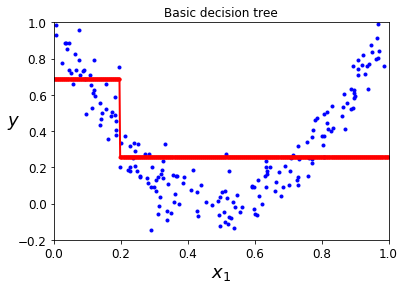

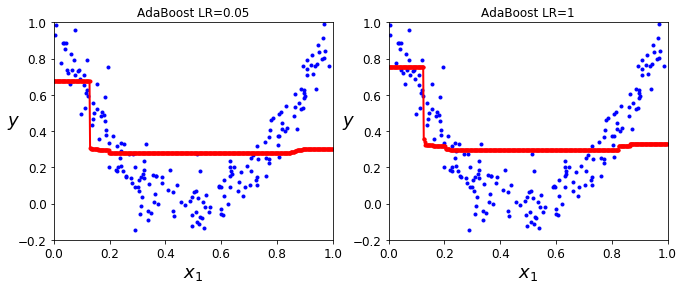

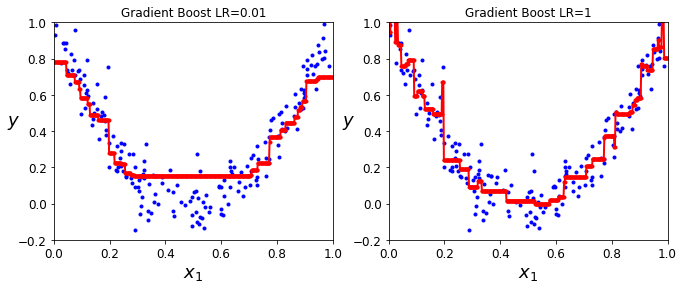

In [17]:
plot_regression_predictions(tree_reg1,X_reg,y_reg)
plt.title('Basic decision tree')
plt.show()

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(adart_005,X_reg,y_reg)
plt.title('AdaBoost LR=0.05')
plt.subplot(122)
plot_regression_predictions(adart_1,X_reg,y_reg)
plt.title('AdaBoost LR=1')
plt.show()

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(gbrt_005,X_reg,y_reg)
plt.title('Gradient Boost LR=0.01')
plt.subplot(122)
plot_regression_predictions(gbrt_1,X_reg,y_reg)
plt.title('Gradient Boost LR=1')
plt.show()

<h3> Beware of overfitting! </h3>

In [18]:
from sklearn.metrics import mean_squared_error

X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(X_reg, y_reg, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=42)
gbrt.fit(X_reg_train, y_reg_train)

errors = [mean_squared_error(y_reg_val, y_reg_pred)
          for y_reg_pred in gbrt.staged_predict(X_reg_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_reg_train, y_reg_train)


/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=199,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

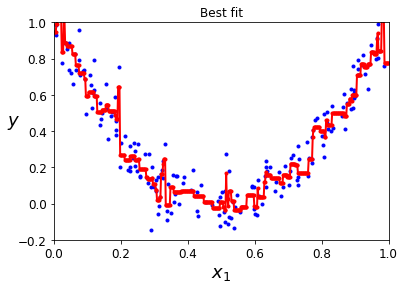

In [19]:
plot_regression_predictions(gbrt_best,X_reg,y_reg)
plt.title('Best fit')
plt.show()


<h3> Note that we only consider max_depth=1 in all of this because of the simplicity of the data</h3>